In [2]:
from scipy.stats import norm
import seaborn as sns
from math import exp,sqrt
import numpy as np
from matplotlib import cm
import pandas as pd
from scipy import stats
from scipy.stats import zscore
from scipy.stats import ttest_ind



import matplotlib.pyplot as plt
%matplotlib inline

from IPython.core.display import SVG

#import sys
#print(sys.executable)
#print(sys.version)
#print(sys.version_info)

This scripts....
- reads in the behavioral data created in Matlab (EM_analysebehavioral.mat, behav variable) for both study & test and EM1 and EM2.
- creates df for RT from miss and CR trials + takes average over the 5 rounds and adds it as column to the RT df
- creates df with only dprime, criterion, RT and group + calculated average of the first three
- saving these dfs using pickle as "behav_basictest/study_eyemem1/2"
- loading these files with pickle and creating one df per age group YA & OA
- t-test for average RT, criterion and dprime
- plotting
- looking at subset of participants that had already participated in EM1, checking especially accuracy
- is data normally distributed? --> does normality check even makes sense with RT data?? NO! 
"Reaction time (RT) is one of the most common types of measure used in experimental psychology. Its distribution is not normal (Gaussian) but resembles a convolution of normal and exponential distributions (Ex-Gaussian). One of the major assumptions in parametric tests (such as ANOVAs) is that variables are normally distributed. Hence, it is acknowledged by many that **the normality assumption is not met**"
- **TO DO:** How is RT data properly cleaned?
- reading in hddm files created in Matlab, creating one df for YA and one for OA
- plot & t-test for accuracy

In [31]:
def read_in(filename, col_lst, em):
    '''reads in behavioral data either am1 or two as defined by em variable, extracts columns given in col_lst,
    drops nan RT values, returns df'''
    
    if em == 1:
        df = pd.read_csv(filename, skiprows=range(1,9)) 
    else:
        df = pd.read_csv(filename, skiprows=range(1,4)) 
    #print(col_lst)
    df = df.loc[:,col_lst]
    print("Any nan values?", df.index[df.isnull().all(1)])
    # 93 rows here for EM1 test, after next line of code only 84 rows remain
    #print(RTs)
    df = df[~df.isin([np.nan, np.inf, -np.inf]).any(1)] #df = df.dropna(axis = 0, how = 'all')
    print("Now all nan values should be gone", df.index[df.isnull().all(1)])
    return df

In [32]:
# all columns I want extracted for eyemem 1, first only for RT and then all dprime, criterion and RT values
em1_RTs_miss_cr = ['RT_misses_1','RT_misses_2','RT_misses_3','RT_misses_4','RT_misses_5','RT_crs_1','RT_crs_2','RT_crs_3','RT_crs_4','RT_crs_5','group', 'subject']
em1_RTs_hit_fas = ['RT_hits_1','RT_hits_2','RT_hits_3','RT_hits_4','RT_hits_5','RT_fas_1','RT_fas_2','RT_fas_3','RT_fas_4','RT_fas_5','group', 'subject']
em1 = ['dprime_1', 'dprime_2', 'dprime_3', 'dprime_4', 'dprime_5', 'RT_1','RT_2','RT_3', 'RT_4', 'RT_5','criterion_1','criterion_2', 'criterion_3', 'criterion_4', 'criterion_5','group', 'subject']
# Columns for Eyemem 2
em2_RTs_miss_cr = ['RT_misses_1','RT_misses_2','RT_misses_3','RT_crs_1','RT_crs_2','RT_crs_3','group', 'subject']
em2_RTs_hit_fas = ['RT_hits_1','RT_hits_2','RT_hits_3','RT_fas_1','RT_fas_2','RT_fas_3','group', 'subject']
em2 = ['dprime_1', 'dprime_2', 'dprime_3','RT_1','RT_2','RT_3', 'criterion_1','criterion_2','criterion_3','group', 'subject']

In [46]:
em1_test_df = read_in("/Users/terlau/LNDG/EyeMem/EyeMem_1/eyemem_behav_1_test.csv", em1, 1)
em1_study_df = read_in("/Users/terlau/LNDG/EyeMem/EyeMem_1/eyemem_behav_1_test.csv", em1, 1)
em2_test_df = read_in("/Users/terlau/LNDG/EyeMem/EyeMem_2/behavior/plotting/eyemem_behav_2_test.csv", em2, 1)
em2_study_df = read_in("/Users/terlau/LNDG/EyeMem/EyeMem_2/behavior/plotting/eyemem_behav_2_test.csv", em2, 1)

Any nan values? Int64Index([2, 10, 31, 36, 39, 46, 47, 61, 64], dtype='int64')
Now all nan values should be gone Int64Index([], dtype='int64')
Any nan values? Int64Index([2, 10, 31, 36, 39, 46, 47, 61, 64], dtype='int64')
Now all nan values should be gone Int64Index([], dtype='int64')
Any nan values? Int64Index([2, 13, 17, 18, 44, 54, 74], dtype='int64')
Now all nan values should be gone Int64Index([], dtype='int64')
Any nan values? Int64Index([2, 13, 17, 18, 44, 54, 74], dtype='int64')
Now all nan values should be gone Int64Index([], dtype='int64')


In [33]:
RT_hit_fa = read_in("/Users/terlau/LNDG/EyeMem/EyeMem_1/eyemem_behav_1_test.csv", em1_RTs_hit_fas, 1)
#df = pd.read_csv("/Users/terlau/LNDG/EyeMem/EyeMem_2/behavior/plotting/eyemem_behav_2_test.csv", skiprows=range(1, 4)) 
RT_hit_fa

Any nan values? Int64Index([2, 10, 31, 36, 39, 46, 47, 61, 64], dtype='int64')
Now all nan values should be gone Int64Index([], dtype='int64')


RT_hits_1  RT_hits_2  RT_hits_3  RT_hits_4  RT_hits_5  RT_fas_1  RT_fas_2  \
0    0.818628   0.823574   0.832263   0.796450   0.811048  0.880250  0.875261   
1    0.792100   0.776990   0.764261   0.785563   0.783728  0.950667  0.863538   
3    0.928000   0.924118   0.884909   0.941973   0.937053  1.048200  0.914833   
4    1.071160   1.139826   1.023486   1.155533   1.163033  1.071621  1.060000   
5    0.933222   0.843743   0.858627   0.826406   0.993833  0.887929  0.825824   
..        ...        ...        ...        ...        ...       ...       ...   
88   0.908673   0.857303   0.795474   0.984253   0.947185  0.831864  0.793625   
89   0.821200   0.828356   0.816724   0.824292   0.828684  0.834000  0.882500   
90   0.749510   0.782409   0.755843   0.760873   0.744640  0.843459  0.866667   
91   0.876250   0.859463   0.819149   0.838239   0.863336  0.846818  0.814091   
92   0.826169   0.973583   0.822886   0.884837   0.937935  0.893667  0.967733   

    RT_fas_3  RT_fas_4  RT_fas_5  group  subject  
0   0.853375  0.880933  0.885222  young   sub-09  
1   1.047000  0.951200  0.935143  young   sub-10  
3   0.895500  1.062929  1.074077    old   sub-12  
4   1.044184  1.085167  1.113412    old   sub-13  
5   0.821000  0.823273  0.999375    old   sub-14  
..       ...       ...       ...    ...      ...  
88  0.672667  0.875267  0.871333  young   sub-97  
89  0.834000  0.834000  0.861667  young   sub-98  
90  0.797889  0.812455  0.821935    old   sub-99  
91  0.817520  0.815048  0.829354    old  sub-100  
92  0.864237  0.950462  0.961233    old  sub-101  

[84 rows x 12 columns]

In [43]:
def get_average_RT(df, col_lst, save_path): # maybe one for RTs and one seperate function for d', c and RT?
    '''gets df extracts columns given by col_lst, gets average values for those
    Appends average to existing df and saves this at given location (save_path) as df using pickle'''
    
    var_1 = df.loc[: , col_lst[0]:col_lst[1]]
    var_2 = df.loc[: ,  col_lst[2]: col_lst[3]]
    df['mean_'+col_lst[0][:-2]] = var_1.mean(axis=1)
    df['mean_'+col_lst[2][:-2]] = var_2.mean(axis=1)
    df.to_pickle(save_path)

In [41]:
# only have hit, fa, miss and crs dfs for em1 test
hit_fa_lst= ['RT_hits_1', 'RT_hits_5','RT_fas_1', 'RT_fas_5']
save_path = '/Users/terlau/LNDG/EyeMem/EyeMem_1/behavior/RT_hit_fa'

**To Do: create hit_fa and miss_crs pickles for em1 study and em2 test & study as well**

In [42]:
get_average_RT(RT_hit_fa, hit_fa_lst, save_path)

### Mean vs median RT
Why this question? "It‚Äôs best to use the mean to describe the center of a dataset when the distribution is mostly symmetrical and there are no outliers." And "it is best to use the median when the distribution is either skewed or there are outliers present (...) The median also does a better job of capturing the central location of a distribution when there are outliers present in the data."...RT data is typically skewed BUT..."Miller (1988) warned that when RT distributions are skewed, as they usually are, **median RTs are biased**. Furthermore, this bias is larger when the number of trials per condition is small. He therefore recommended that **medians should not be used when comparing conditions with different numbers of trials**, because the larger bias could cause conditions with fewer trials to appear slower, even with identical RT distributions in both conditions. (...) Rousselet & Wilcox, 2020 (R&W) concluded that ‚Äúthe recommendation by Miller (1988) to not use the median when comparing distributions that differ in sample size was ill-advised‚Äù (p. 31). Their conclusions have been influential in encouraging researchers to analyze median RTs (e.g., Gordon et al., 2020; Maksimenko et al., 2019; Thornton & Zdravkoviƒá, 2020). (...) It is obviously desirable to use a summary measure that provides as much power as possible while staying within the chosen level of Type I error rate. In particular, the present simulations sought to identify the summary method that would provide the greatest power when comparing condition means of the summary scores across participants via parametric tests (e.g., t-tests or ANOVAs), as is most commonly done."
**Recommendation for conditions with unequal number of trials:** "When comparing conditions with unequal numbers of trials, the sample-size-dependent bias of regular medians can lead to clear inflation of the Type I error rate, so these medians definitely should not be used. Means and bias-corrected medians are both free of this bias and thus have acceptable Type I error rates, so either could be considered as a possible summary measure in this situation.
Means clearly have greater power than bias-corrected medians in most situations, however, which would nearly always make them the preferred choice"
**Recommendation for conditions with equal number of trials:** Means, medians, and bias-corrected medians all have appropriate Type I error rates, so any of these might be the preferred summary measure in this situation. Bias-corrected medians always seem to have less power than regular medians, however, so here the choice is really between means and regular medians, depending on which of those has the higher power. As can be seen in Figure 6), the answer depends on how the experimental manipulation affects skewness. Thus, to choose between means and medians as the summary measure maximizing power, researchers must consider the effect of the **experimental manipulation at the level of the RT distribution**. The results in Figure 6 suggest that the two measures will have approximately
equal power when RT skewness is unaffected by the manipulation, whereas medians will have greater power if skewness decreases in the slower condition and means will have greater power if skewness increases in the slower condition. Although the ex-Gaussian œÑ is one way of assessing skewness, it is not always necessary to estimate ex-Gaussian
parameters from RT distributions. Instead, one can use a simpler skewness measure‚Äînamely, the difference between the mean and median of RT‚Äîas a proxy for œÑ . If this difference is smaller in the slower condition than the faster one, that is a sign that power will be better using medians. On the other hand, if this difference is larger
in the slower condition, power will be better using means"

**Note:** "It would be inappropriate to decide whether to analyze mean or median RTs based on whichever gave the larger effect in a given dataset, because this would inflate the researcher‚Äôs Type I error rate." --> should have been decided a priori, otherwise could be seen as *p-hacking*

**To Do:** check how different number of trials is between conditions! In our case between YA and OA + check if RT skewness is affected by age difference!

(df['mean_RT'] - df['median_RT']).abs().idxmax()
df[['mean_RT','median_RT']].plot(alpha=0.4)

In [47]:
def get_average(df, col_lst, save_path, file_name): # median vs mean RT? What is recommended by the literature??
    '''gets df extracts columns given by col_lst, gets average values for those
    Appends average to existing df and saves this at given location (save_path) as df using pickle'''
    
    var_1 = df.loc[: , col_lst[0]:col_lst[1]]
    var_2 = df.loc[: ,  col_lst[2]: col_lst[3]]
    var_3 = df.loc[: ,  col_lst[4]: col_lst[5]]
    df['mean_'+col_lst[0][:-2]] = var_1.mean(axis=1)
    df['mean_'+col_lst[2][:-2]] = var_2.mean(axis=1)
    df['mean_'+col_lst[4][:-2]] = var_3.mean(axis=1)
    df.to_pickle(save_path+file_name)
    return df

In [48]:
# EyeMem1
em1_col_lst = ['dprime_1','dprime_5', 'criterion_1', 'criterion_5', 'RT_1', 'RT_5']
em1_save_path = '/Users/terlau/LNDG/EyeMem/EyeMem_1/behavior/'
em1_test_fn = 'behav_basic_test_eyemem1'
em1_study_fn = 'behav_basic_study_eyemem1'
em1_test = get_average(em1_test_df,em1_col_lst,em1_save_path,em1_test_fn)
em1_study = get_average(em1_study_df,em1_col_lst,em1_save_path,em1_study_fn)
# EyeMem2
em2_col_lst = ['dprime_1','dprime_3', 'criterion_1', 'criterion_3', 'RT_1', 'RT_3']
em2_save_path = '/Users/terlau/LNDG/EyeMem/EyeMem_2/behavior/'
em2_test_fn = 'behav_basic_test_eyemem2'
em2_study_fn = 'behav_basic_study_eyemem2'
em2_test = get_average(em2_test_df, em2_col_lst,em2_save_path,em2_test_fn)
em2_study = get_average(em2_study_df, em2_col_lst,em2_save_path,em2_study_fn)

In [52]:
#df = pd.read_pickle('/Users/terlau/LNDG/EyeMem/EyeMem_2/behavior/behav_basic_test_eyemem2')
#df = pd.read_pickle('/Users/terlau/LNDG/EyeMem/EyeMem_1/behav_basic_test_eyemem1')
print(em1_test.head())
em2_test.head()

   dprime_1  dprime_2  dprime_3  dprime_4  dprime_5      RT_1      RT_2  \
0  1.952393  0.594042  1.113032  2.563103  1.838685  0.824067  0.828800   
1  1.135316  1.094968  1.928008  2.675536  1.278666  0.818183  0.786967   
3  1.333192  1.059420  1.584738  2.087262  0.940857  0.980483  0.942441   
4  0.684074  0.218696  0.955128  0.884852  0.239508  1.037600  1.046350   
5  1.094968  0.771422  0.253347  1.451466  0.918549  0.876746  0.849559   

       RT_3      RT_4      RT_5  criterion_1  criterion_2  criterion_3  \
0  0.783633  0.766283  0.811517     0.134575     0.043674     0.092808   
1  0.815000  0.800367  0.838267     0.399764    -0.294137     0.146767   
3  0.905467  0.918483  0.967317     0.834490     0.311911     0.708717   
4  0.998600  1.092593  1.077183    -0.088690     0.732273     0.046837   
5  0.775458  0.813983  0.911431     0.294137     0.045016     0.126674   

   criterion_4  criterion_5  group subject  mean_dprime  mean_criterion  \
0    -0.000000     0.191429  

dprime_1  dprime_2  dprime_3      RT_1      RT_2      RT_3  criterion_1  \
0  2.546559  1.350839  1.252314  0.998983  1.116950  0.974200    -0.545366   
1  1.147326  0.963621  1.885071  1.181067  1.167400  1.152017    -0.049263   
3  0.430727 -0.122896  0.508589  2.315236  1.945448  2.539962    -0.215364   
4  1.272349  1.364119  1.656533  1.267949  1.236864  1.291067    -0.205447   
5  0.777748  0.297186  1.070584  1.268000  1.421067  1.272350     0.135527   

   criterion_2  criterion_3 group  subject  mean_dprime  mean_criterion  \
0     0.052494    -0.101756     Y  11024.0     1.716571       -0.198210   
1    -0.141115    -0.319610     Y  11029.0     1.332006       -0.169996   
3    -0.279247    -0.086400     Y  11032.0     0.272140       -0.193670   
4    -0.428712     0.036628     Y  11046.0     1.431000       -0.199177   
5    -0.579320    -0.281945     Y  11048.0     0.715173       -0.241913   

    mean_RT  
0  1.030044  
1  1.166828  
3  2.266882  
4  1.265293  
5  1.320472

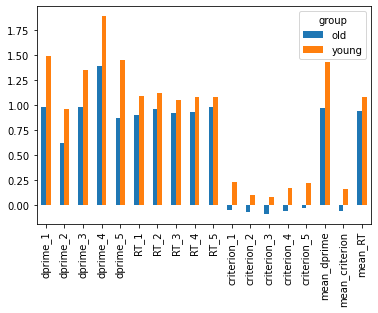

In [50]:
em1_test.groupby('group').mean().transpose().plot.bar()
#plt.title('Overview EyeMem1 Study')
#plt.savefig('/Users/terlau/LNDG/EyeMem/plotting/overview_study_eyemem1')

plt.show()

In [53]:
def age_grouping_em2(df):
    ya_df = df.loc[df['group'] == 'Y']
    oa_df = df.loc[df['group'] == 'O']
    #print(ya_df.describe())
    #print(oa_df.describe()) 
    return ya_df, oa_df

In [54]:
def age_grouping_em1(df):
    ya_df = df.loc[df['group'] == 'young']
    oa_df = df.loc[df['group'] == 'old']
    #print(ya_df.describe())
    #print(oa_df.describe()) 
    return ya_df, oa_df

In [57]:
em1_ya_study, em1_oa_study = age_grouping_em1(em1_study)
em1_ya_test, em1_oa_test = age_grouping_em1(em1_test)

In [58]:
em2_ya_study, em2_oa_study = age_grouping_em2(em2_study)
em2_ya_test, em2_oa_test = age_grouping_em2(em2_test)

In [65]:
#print(em1_ya_study.describe())
em1_oa_study.describe() # count is 42 for both groups so trials should be the same here 

dprime_1   dprime_2   dprime_3   dprime_4   dprime_5       RT_1  \
count  42.000000  42.000000  42.000000  42.000000  42.000000  42.000000   
mean    0.975095   0.618384   0.974083   1.386339   0.866007   0.901004   
std     0.603846   0.474322   0.541122   0.561999   0.647541   0.292256   
min    -0.125800  -0.239508  -0.121587   0.000000  -0.777748   0.000000   
25%     0.707493   0.328499   0.608023   1.032035   0.288464   0.802711   
50%     0.947992   0.548342   0.919449   1.464547   0.921136   0.890642   
75%     1.305086   1.019065   1.413124   1.749573   1.203821   1.010033   
max     2.801336   1.491822   2.009465   2.445756   2.124012   1.703797   

            RT_2       RT_3       RT_4       RT_5  criterion_1  criterion_2  \
count  42.000000  42.000000  42.000000  42.000000    42.000000    42.000000   
mean    0.959014   0.922551   0.930648   0.974780    -0.052621    -0.069282   
std     0.234881   0.244880   0.227481   0.167836     0.471116     0.408765   
min     0.000000   0.000000   0.000000   0.728300    -1.228420    -1.039097   
25%     0.864983   0.826989   0.857475   0.873016    -0.277094    -0.301318   
50%     0.944679   0.881933   0.887410   0.943817    -0.077089    -0.062741   
75%     1.050689   0.971871   0.984979   1.023121     0.127049     0.208720   
max     1.763483   1.718350   1.734717   1.608550     1.110772     0.847667   

        criterion_3  criterion_4  criterion_5  mean_dprime  mean_criterion  \
count  4.200000e+01    42.000000    42.000000    42.000000       42.000000   
mean  -8.913930e-02    -0.063403    -0.030100     0.963981       -0.060909   
std    4.742483e-01     0.426111     0.509982     0.449874        0.404940   
min   -1.557733e+00    -0.951149    -1.228420     0.117295       -1.200964   
25%   -2.750236e-01    -0.383423    -0.381022     0.596638       -0.340818   
50%   -8.326673e-17    -0.091853     0.012300     0.921508       -0.067930   
75%    1.468469e-01     0.316537     0.335549     1.298639        0.222468   
max    8.484632e-01     0.790284     1.062006     2.005684        0.871170   

         mean_RT  
count  42.000000  
mean    0.937599  
std     0.208002  
min     0.335490  
25%     0.853045  
50%     0.896614  
75%     1.006026  
max     1.667293

**To Do: Check why study and test for em1 & em2 have the same mean values!**

In [68]:
#em2_ya_test.describe()
em2_oa_test.describe() # EM2 YA count=29, OA count=32 so different trials per condition here

dprime_1   dprime_2   dprime_3       RT_1       RT_2       RT_3  \
count  29.000000  29.000000  29.000000  29.000000  29.000000  29.000000   
mean    1.364575   0.815491   1.240076   1.380245   1.374747   1.366673   
std     0.613931   0.467597   0.472063   0.295307   0.264219   0.344008   
min     0.430727  -0.122896   0.000000   0.998983   0.987100   0.974200   
25%     0.865095   0.558493   1.068608   1.230133   1.226525   1.152017   
50%     1.398149   0.945983   1.272349   1.327417   1.325333   1.286900   
75%     1.712279   1.147326   1.534899   1.503783   1.426517   1.447683   
max     2.782638   1.891191   2.096264   2.315236   2.179326   2.539962   

       criterion_1  criterion_2  criterion_3       subject  mean_dprime  \
count    29.000000    29.000000    29.000000     29.000000    29.000000   
mean      0.069077    -0.110169    -0.014902  11637.551724     1.140047   
std       0.337156     0.331195     0.388374    500.341782     0.408439   
min      -0.545366    -0.957134    -0.958783  11024.000000     0.272140   
25%      -0.215364    -0.296271    -0.309110  11060.000000     0.826953   
50%       0.119754    -0.130082    -0.077089  12016.000000     1.160894   
75%       0.262200     0.061448     0.267164  12050.000000     1.352109   
max       0.770749     0.388874     0.726438  12106.000000     2.103000   

       mean_criterion    mean_RT  
count       29.000000  29.000000  
mean        -0.018665   1.373888  
std          0.305362   0.292042  
min         -0.711961   1.030044  
25%         -0.199177   1.204989  
50%         -0.075720   1.315606  
75%          0.134746   1.508285  
max          0.536372   2.266882

In [87]:
def t_test(df1, df2, col):
    '''returns t and corresponding p value for given df columns'''
    t,p = stats.ttest_ind(df1[col],df2[col])
    print("The difference between means", np.mean(df1[col]), np.mean(df2[col]))
    print(col+ " t-val:", t, "p-val:", p)
    return p

### EyeMem1 T-Test for dprime, criterion and RT YA vs OA

In [94]:
em1_dprime_study_p = t_test(em1_ya_study, em1_oa_study,'mean_dprime') # em1 study and test seem to be the same???? check this!!
em1_dprime_test_p = t_test(em1_ya_test, em1_oa_test,'mean_dprime')
em1_c_study_p = t_test(em1_ya_study, em1_oa_study,'mean_criterion')
em1_c_test_p = t_test(em1_ya_test, em1_oa_test,'mean_criterion')
em1_RT_study_p = t_test(em1_ya_study, em1_oa_study,'mean_RT')
em1_RT_test_p = t_test(em1_ya_test, em1_oa_test,'mean_RT')

The difference between means 1.42645999880284 0.9639814173848855
mean_dprime t-val: 4.423150248415635 p-val: 2.9636593723466247e-05
The difference between means 1.42645999880284 0.9639814173848855
mean_dprime t-val: 4.423150248415635 p-val: 2.9636593723466247e-05
The difference between means 0.15967240076959552 -0.0609090224654098
mean_criterion t-val: 2.7568349181725806 p-val: 0.007191802956647462
The difference between means 0.15967240076959552 -0.0609090224654098
mean_criterion t-val: 2.7568349181725806 p-val: 0.007191802956647462
The difference between means 1.0827177068440759 0.9375994060373426
mean_RT t-val: 2.5895623335885944 p-val: 0.011368413463749089
The difference between means 1.0827177068440759 0.9375994060373426
mean_RT t-val: 2.5895623335885944 p-val: 0.011368413463749089


### EyeMem2 t-test for dprime, criterion and RT YA vs OA

In [95]:
em2_dprime_study_p = t_test(em2_ya_study, em2_oa_study,'mean_dprime') 
em2_dprime_test_p = t_test(em2_ya_test, em2_oa_test,'mean_dprime')
em2_c_study_p = t_test(em2_ya_study, em2_oa_study,'mean_criterion')
em2_c_test_p = t_test(em2_ya_test, em2_oa_test,'mean_criterion')
em2_RT_study_p = t_test(em2_ya_study, em2_oa_study,'mean_RT')
em2_RT_test_p = t_test(em2_ya_test, em2_oa_test,'mean_RT')

The difference between means 1.1400472077337582 0.9490698213395475
mean_dprime t-val: 1.5787144437330918 p-val: 0.11974855954599607
The difference between means 1.1400472077337582 0.9490698213395475
mean_dprime t-val: 1.5787144437330918 p-val: 0.11974855954599607
The difference between means -0.01866463383972116 -0.1811437361689493
mean_criterion t-val: 1.8298409546082903 p-val: 0.07232714048055336
The difference between means -0.01866463383972116 -0.1811437361689493
mean_criterion t-val: 1.8298409546082903 p-val: 0.07232714048055336
The difference between means 1.373888240019701 1.4662944544743568
mean_RT t-val: -1.0700800629027478 p-val: 0.28894153040832293
The difference between means 1.373888240019701 1.4662944544743568
mean_RT t-val: -1.0700800629027478 p-val: 0.28894153040832293


### Plotting for RT, criterion and dprime

In [1]:
def plot_sdt_vals(df, x, val, p_val, study_phase):
    
    sns.set(style="whitegrid")
    sns.barplot(x=x, y=val, data=df, capsize=.1, ci="sd")
    sns.swarmplot(x=x, y=val, data=df, color="0", alpha=.35)
    x1, x2 = 0, 1   
    y, h, col = df[val].max()+0.1,0.1, 'k'
    plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1, c=col)
    plt.text((x1+x2)*.5, y+h, p_val, ha='center', va='bottom', color=col)
    plt.title(val.split('_')[1] + " for OA vs YA "+study_phase)
    #plt.savefig('/Users/terlau/LNDG/EyeMem/EyeMem_1/dprime_test_eyemem1.png')
    plt.show()

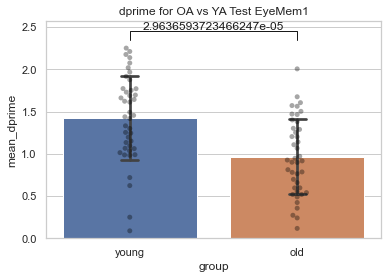

In [148]:
plot_sdt_vals(em1_test,"group","mean_dprime", em1_dprime_test_p, "Test EyeMem1")

### Participant Pool Overlap

Checking accuracy of participants of EM2 Cohort -subset of 15 participant- that had already participated in Eyemem1.

#### Accuracy of subset of participants

In [109]:
#subjectslst = df['subject']
df = em2_test[em2_test['subject'].isin([11075,12013,21035,21072,22004,22021,21059,21069,21052,22045,22043,22020,12039,21093,21094])]
df['subject']

11    11075.0
27    12039.0
42    21035.0
46    21052.0
47    21059.0
49    21069.0
51    21072.0
55    22004.0
58    22020.0
63    22043.0
64    22045.0
Name: subject, dtype: float64

In [111]:
def read_hddm(file_path):
    df = pd.read_csv(file_path)
    # Clean from Invalid Reaction Times 
    df = df.loc[~df['rt'].isnull()]
    #df = df.fillna(0)
    print(np.unique(df['response']))
    print(len(df[df['response'].isnull()].index.tolist()))
    return df

In [136]:
em2_hddm_test = read_hddm("/Users/terlau/LNDG/EyeMem/EyeMem_2/behavior/plotting/EyeMem_hddm_test.csv")
em2_hddm_study = read_hddm("/Users/terlau/LNDG/EyeMem/EyeMem_2/behavior/plotting/EyeMem_hddm_study.csv")
em1_hddm_test = pd.read_csv("/Users/terlau/LNDG/EyeMem/EyeMem_1/HDDM/EyeMem_hddm_test.csv")
em1_hddm_study = pd.read_csv("/Users/terlau/LNDG/EyeMem/EyeMem_1/HDDM/EyeMem_hddm_study.csv")

[1. 2.]
0
[1. 2.]
0


In [118]:
# extract subset of participants that had already taken part in EyeMem1
mask = em2_hddm_test['subj_idx'].isin([11075,12013,21035,21072,22004,22021,21059,21069,21052,22045,22043,22020,12039,21093,21094])

em2_hddm_test_rest=em2_hddm_test[~mask]

em2_hddm_test_subset=em2_hddm_test[mask]


In [119]:
em2_hddm_test_subset

subj_idx  category  stim  response  accuracy     rt  age
2867      11075         3     0       2.0         0  1.048    0
2868      11075         3     0       1.0         1  0.718    0
2869      11075         3     1       2.0         1  1.337    0
2870      11075         3     1       2.0         1  1.411    0
2871      11075         3     0       1.0         1  1.331    0
...         ...       ...   ...       ...       ...    ...  ...
11540     22045         2     0       1.0         1  1.488    1
11541     22045         2     0       2.0         0  0.817    1
11543     22045         2     0       2.0         0  1.567    1
11544     22045         2     0       1.0         1  1.094    1
11545     22045         2     1       2.0         1  1.010    1

[1844 rows x 7 columns]

In [120]:
print(em2_hddm_test_subset['subj_idx'].unique()) # length = 11

[11075 12039 21035 21052 21059 21069 21072 22004 22020 22043 22045]


### Check accuracy and RT difference between Subset and Rest of Participant Group

In [132]:
acc_p=t_test(em2_hddm_test_subset, em2_hddm_test_rest, "accuracy")
rt_p=t_test(em2_hddm_test_subset, em2_hddm_test_rest, "rt")

The difference between means 0.7006507592190889 0.6900806834361651
accuracy t-val: 0.9179571812490033 p-val: 0.35865656855177264
The difference between means 1.3984647505423005 1.445571270368615
rt t-val: -4.127382463404593 p-val: 3.6896940860889436e-05


In [127]:
def age_grouping_ddm(df):
    ya_df = df.loc[df['age'] == 0]
    oa_df = df.loc[df['age'] == 1]
    #print(ya_df.describe())
    #print(oa_df.describe()) 
    return ya_df, oa_df

In [128]:
ya_t_sub, oa_t_sub = age_grouping_ddm(em2_hddm_test_subset)
ya_t_rest, oa_t_rest = age_grouping_ddm(em2_hddm_test_rest)

In [133]:
ya_rt_p = t_test(ya_t_sub, ya_t_rest, "rt")
oa_rt_p = t_test(oa_t_sub, oa_t_rest, "rt")

The difference between means 1.1844491525423724 1.3651821618834803
rt t-val: -7.599679501555755 p-val: 3.411072271200996e-14
The difference between means 1.4493114093959754 1.5141311739703942
rt t-val: -4.895605818017784 p-val: 9.984954522208622e-07


In [135]:
ya_acc_p = t_test(ya_t_sub, ya_t_rest, "accuracy")
oa_acc_p = t_test(oa_t_sub, oa_t_rest, "accuracy")

The difference between means 0.7203389830508474 0.7124935555937446
accuracy t-val: 0.3167496773973227 p-val: 0.751444265405245
The difference between means 0.6959731543624161 0.6709658507987689
accuracy t-val: 1.8679688189097392 p-val: 0.061801580842556256


**To Do: Figure out why p-vals significant for RT but not acc, does it have to do with the distribution or the difference in trial number per condition? Is a t-test here even valid?**

#### Compare the subgroup to the subset of the overall group that does not include the subgroup

You can test the difference in means between the subset and the overall group as long as you account for the covariance between ùëã and ùëãsub in your standard error calculation

**To Do: Create plot for accuracy & RT for Rest vs Subset** 

### Accuracy for all participants YA vs OA for EyeMem1 and EyeMem2 Test and Study

In [141]:
em1_test_ya,em1_test_oa = age_grouping_ddm(em1_hddm_test)
em1_study_ya,em1_study_oa = age_grouping_ddm(em1_hddm_study)
em2_test_ya,em2_test_oa = age_grouping_ddm(em2_hddm_test)
em2_study_ya,em2_study_oa = age_grouping_ddm(em2_hddm_study)

In [145]:
em1_test_acc_p=t_test(em1_test_ya, em1_test_oa, "accuracy")
em1_study_acc_p=t_test(em1_study_ya, em1_study_oa, "accuracy")
em2_test_acc_p=t_test(em2_test_ya, em2_test_oa, "accuracy")
em2_study_acc_p=t_test(em2_study_ya, em2_study_oa, "accuracy")

The difference between means 0.7353878006051919 0.6685429923315386
accuracy t-val: 11.545056372077315 p-val: 9.370619946845784e-31
The difference between means 0.9287312240332375 0.863733027973172
accuracy t-val: 11.938819405334398 p-val: 1.1227124222741986e-32
The difference between means 0.7129434634699497 0.6754480933477686
accuracy t-val: 4.8350192653384925 p-val: 1.3449983669381212e-06
The difference between means 0.936342968496265 0.8947242206235012
accuracy t-val: 6.211192040004127 p-val: 5.548999025021076e-10


### Plotting Accuracy

In [144]:
# Prepare for the bar plot below
# Create lists for the plot
fits = ['YA', 'OA']
x_pos = np.arange(len(fits))
CTEs = [em1_test_ya['accuracy'].mean(), em1_test_oa['accuracy'].mean()]
error = [np.std(em1_test_ya['accuracy']), np.std(em1_test_oa['accuracy'])]

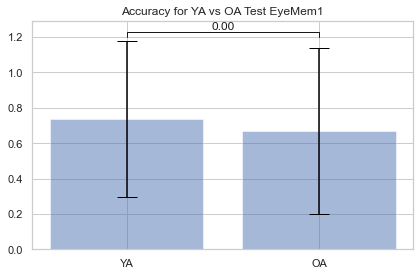

In [146]:
fig, ax = plt.subplots()
ax.bar(x_pos, CTEs, yerr=error, align='center', alpha=0.5, ecolor='black', capsize=10)
x1, x2 = 0, 1   
y, h, col = em1_hddm_test['accuracy'].max()+0.2,0.03, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1, c=col)
plt.text((x1+x2)*.5, y+h, '0.00', ha='center', va='bottom', color=col)
ax.set_xticks(x_pos)
ax.set_xticklabels(fits)
ax.set_title("Accuracy for YA vs OA Test EyeMem1")
ax.yaxis.grid(True)


plt.tight_layout()
plt.show()

In [2]:
plot_sdt_vals(em1_hddm_test, "age", "accuracy", em1_test_acc_p, "EyeMem1 Test")

NameError: name 'em1_hddm_test' is not defined

Different approach for checking accuracy. Taking the mean per subject here first instead of the mean overall subjects. 

**To Do: See if there's a significant difference between these two approaches**

In [63]:
def avg_per_sub(df):
    SubjectList = np.unique(df['subj_idx'])
    acc = []
    age = []
    sub_id = []
    for sub in SubjectList:
        sub_id.append(sub)
        sub_df = df[df['subj_idx'] == sub]
        age.append(int(sub_df['age'].mean()))
        acc.append(sub_df['accuracy'].mean())
        
    acc_dict= {'subject': sub_id, 'age': age, 'accuracy': acc}
    acc_df = pd.DataFrame(acc_dict)
    return acc_df

In [64]:
avg_per_sub(em1_hddm_test)

subject  age  accuracy
0        13    1  0.804469
1        17    1  0.741573
2        76    1  0.731844
3        81    1  0.691429
4        86    1  0.774011
..      ...  ...       ...
67    22064    1  0.664773
68    22066    1  0.597765
69    22068    1  0.591667
70    22076    1  0.731844
71    22080    1  0.717514

[72 rows x 3 columns]

In [83]:
df_age = acc_df.groupby('age')
for idx, group in df_age:
    if idx==0:
        y_acc = group['accuracy']
    if idx == 1:
        o_acc = group['accuracy']

#### RT dat is not normally distributed 

Just go through literature and look at recommendations for how to deal with RT data, e.g. outliers 

In [ ]:
from scipy.stats import shapiro, normaltest, anderson
stat, p = shapiro(df_test['rt'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print("Data follows Normal Distribution")
else:
    print("Data does not follow Normal Distribution")

stat, p = normaltest(df_test['rt'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Data follows normal')
else:
    print('Data does not follow normal')

result = anderson(df_test['rt'])
print(result)

print('stat=%.3f' % (result.statistic))
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < cv:
        print('Data follows Normal at the %.1f%% level' % (sl))
    else:
        print('Data does not follows Normal at the %.1f%% level' % (sl))